<center><img src="img/aml-logo.png" width="600"/>

***

<center>Lecture 4</center>

***

<center>Preprocessing and Feature Transformation  </center>

***

<center>26 February 2024<center>
<center>Rahman Peimankar<center>

# Agenda

* Data Scaling
* CV and GridSearchCV with sklearn Pipeline 
* Feature Transformation (ColumnTransformer)

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.
<div style="text-align: right">
"Andrew Ng"

# Recap of Last Week

<div>
<center>
<img src="img/image-6-lecture3.jpg" width="700"/>

<div>
<center>
<img src="img/image-7-lecture3.jpg" width="800"/>

<div>
<center>
<img src="img/image-11-lecture3.jpg" width="800"/>

<div>
<center>
<img src="img/image-14-lecture3.jpg" width="1500"/>

<div>
<center>
<img src="img/image-16-lecture3.jpg" width="900"/>

<div>
<center>
<img src="img/image-17-lecture3.jpg" width="900"/>

<div>
<center>
<img src="img/image-20-lecture3.jpg" width="1400"/>

# Breast cancer dataset

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [16]:
from sklearn.datasets import load_breast_cancer
bcd = load_breast_cancer()
from sklearn.model_selection import train_test_split
X, y = bcd.data, bcd.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(bcd.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Looking into the distribution of the features

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

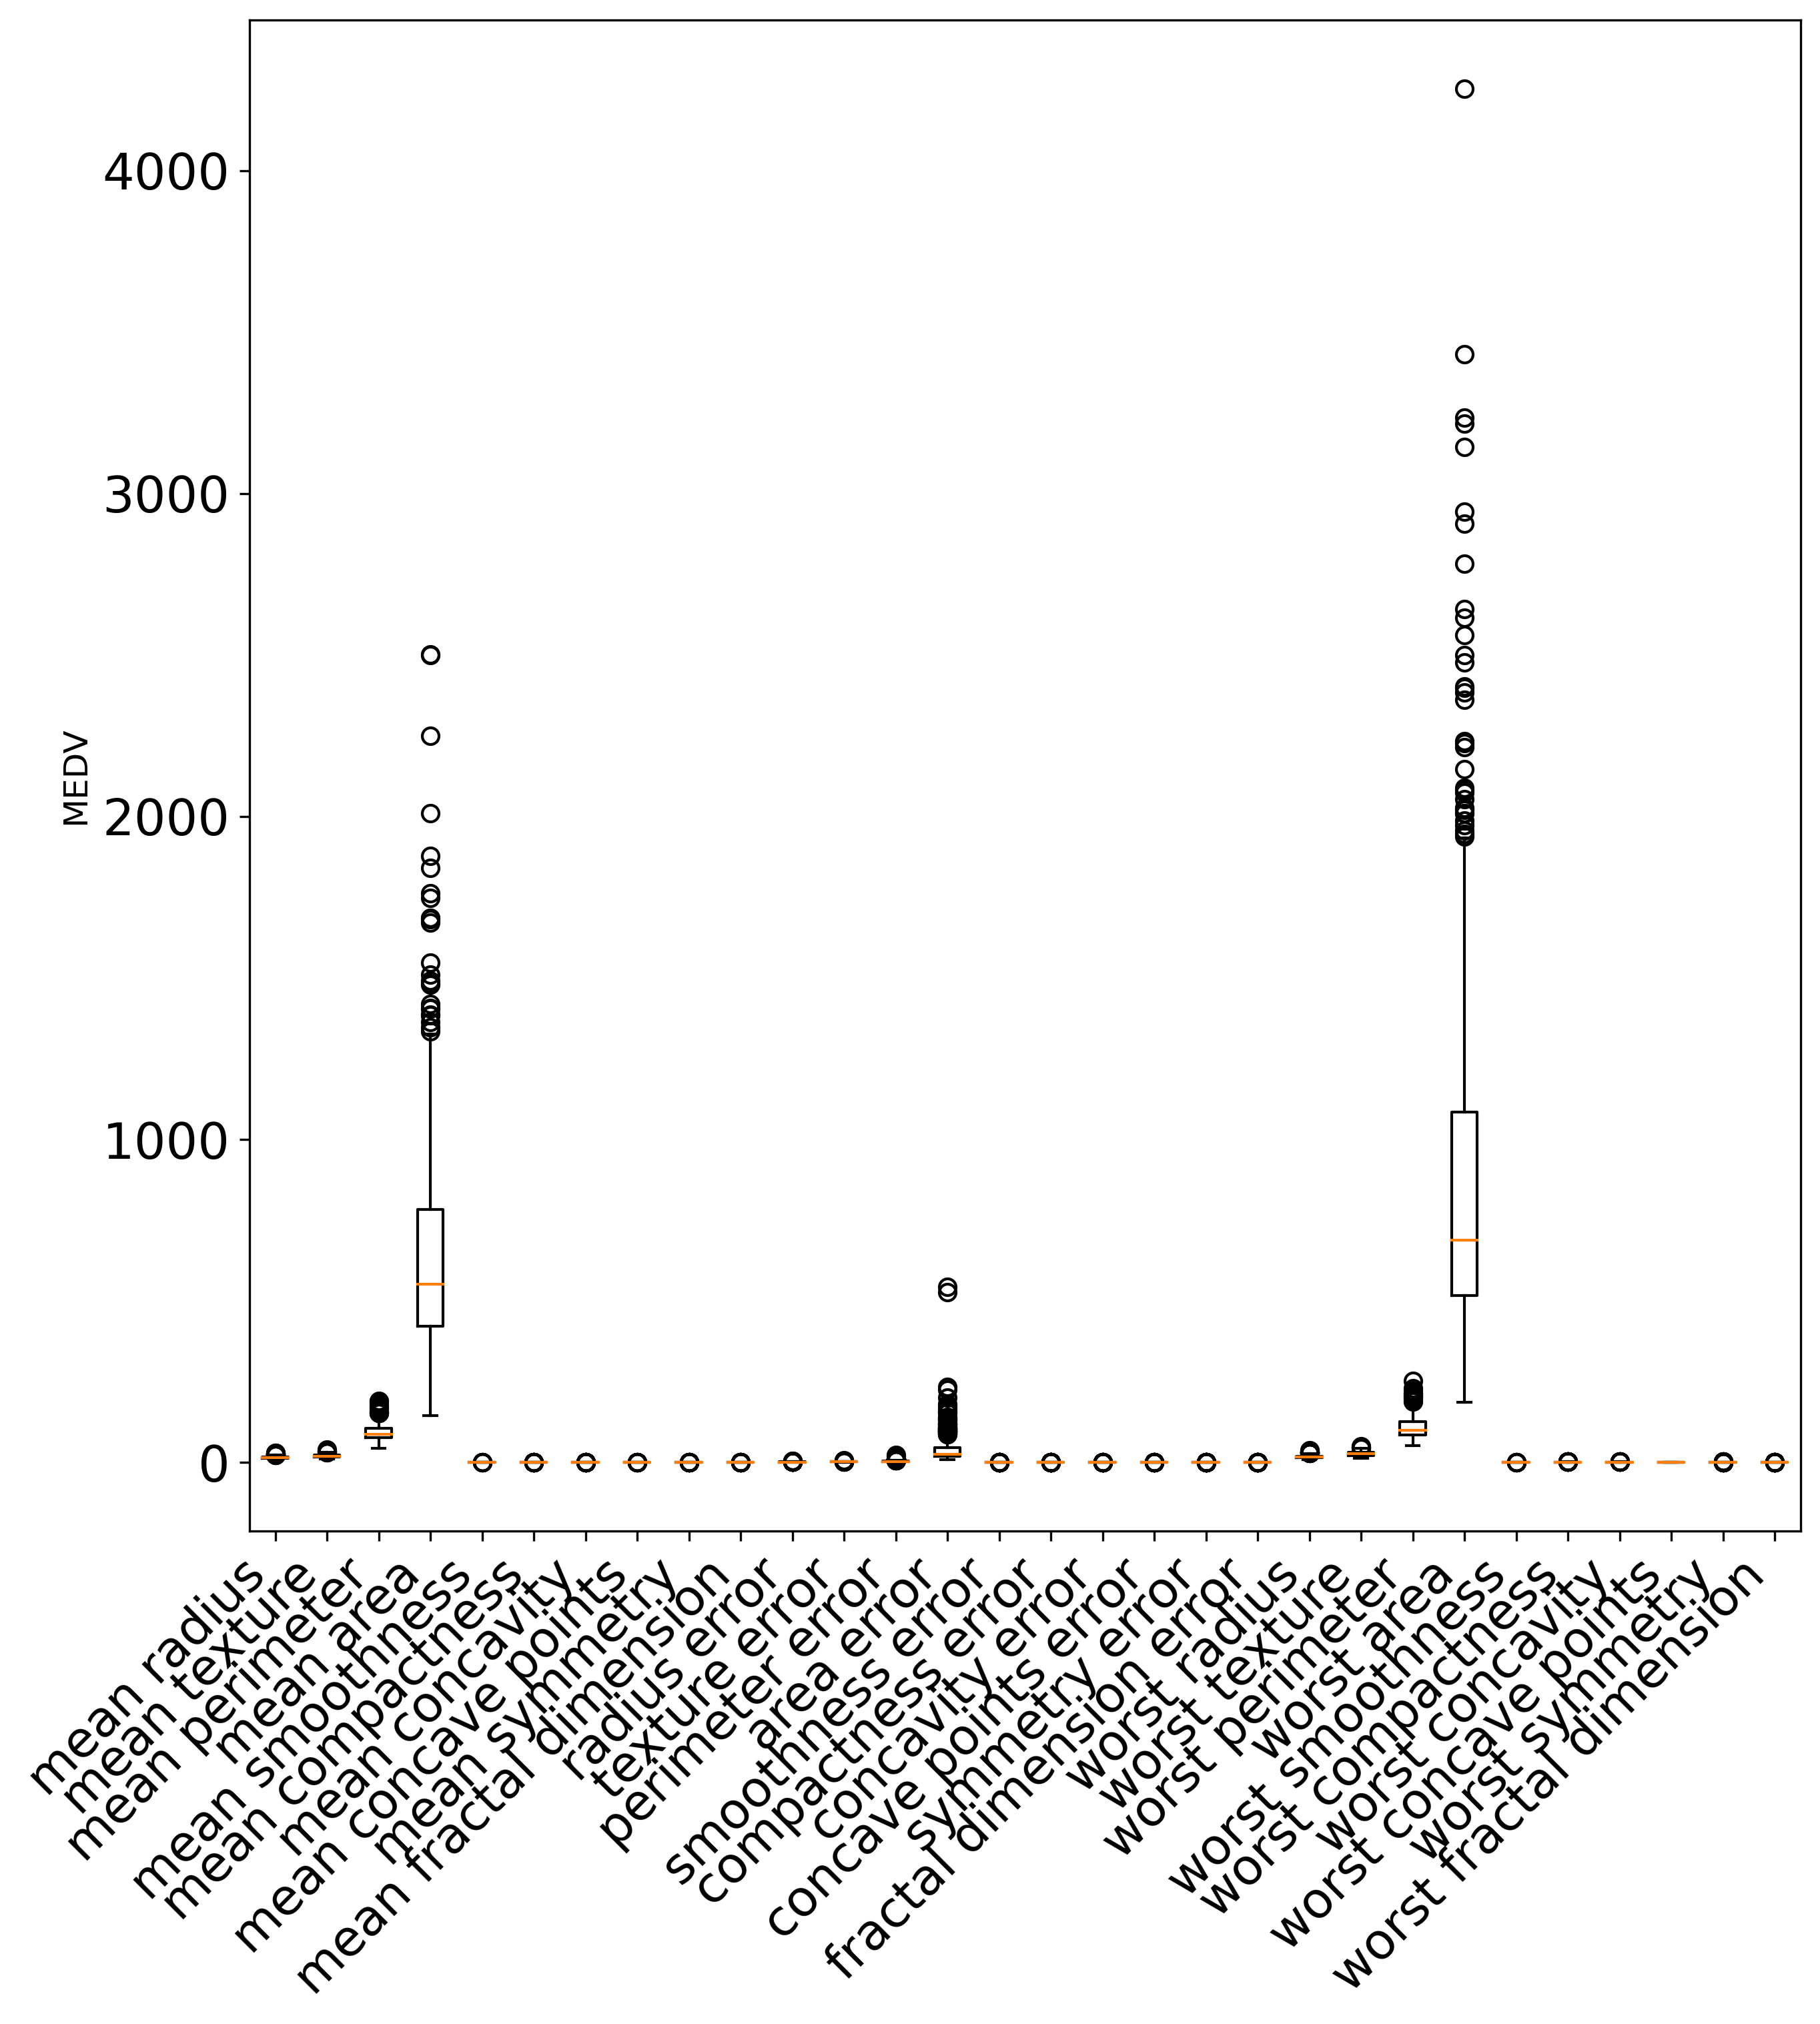

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi=300)
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1), bcd.feature_names, rotation=45, ha="right", fontsize=18)
plt.ylabel("MEDV", fontsize=12)
plt.yticks(fontsize=18)


# Scaling and Distances

<div>
<center>
<img src="img/image-2.jpg" width="700"/>
</div>

<div>
<center>
<img src="img/image-3.jpg" width="700"/>
</div>

# Different Ways to Scale the Data

<div>
<center>
<img src="img/image-4.jpg" width="1200"/>
</div>

# Standard Scaler Example

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X, y = bcd.data, bcd.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
# X_train_scaled = scaler.fit_transform(X_train)

knn_scaled = KNeighborsClassifier().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print('Scaled: {}'.format(knn_scaled.score(X_test_scaled, y_test)))

knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print('Not scaled: {}'.format(knn_unscaled.score(X_test, y_test)))


Scaled: 0.951048951048951
Not scaled: 0.9370629370629371


In [25]:
X_train

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 9.140e-02, 3.101e-01,
        7.007e-02],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 2.022e-02, 3.292e-01,
        6.522e-02],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 1.628e-01, 2.572e-01,
        6.637e-02],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 1.909e-01,
        6.559e-02],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 9.653e-02, 2.112e-01,
        8.732e-02]])

In [34]:
X_train_scaled.shape

(426, 30)

In [38]:
import numpy as np
print(np.mean(X_train_scaled[:,0]))
print(np.std(X_train_scaled[:,0]))


-3.356730647223478e-15
0.9999999999999994


# Proper scaling

<div>
<center>
<img src="img/image-5.jpg" width="1200"/>
</div>

Please discuss your idea about the above figures and why the last scaling approach/figure is not proper. 

# Sckit-Learn API Summary

<div>
<center>
<img src="img/image-6.jpg" width="1200"/>
</div>

<font size="8"><center>A note on preprocessing
***
<font size="8"><center>(and pipelines)

# Leaking Information

<div>
<center>
<img src="img/image-7.jpg" width="800"/>
</div>

<div>
<center>
<img src="img/image-8.jpg" width="800"/>
</div>

<div>
<center>
<img src="img/image-9.jpg" width="1100"/>
</div>

# Naming Steps

In [18]:
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
print(knn_pipe.steps)

[('standardscaler', StandardScaler()), ('kneighborsregressor', KNeighborsRegressor())]


In [4]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((("scaler", StandardScaler()), ("regressor", KNeighborsRegressor)))

# Pipeline and GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
knn_pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test, y_test))

{'kneighborsregressor__n_neighbors': 8}
0.8519785115303983


<font size="8"><center>Discrete features

## Quiz - Feature

Can you name some feature types?

Please write your answers [here](https://PollEv.com/free_text_polls/nMJOHjqBWKY61qNSGP6Ct/respond).

# Categorical Variables

In [8]:
import pandas as pd

df = pd.DataFrame(
{'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})

df

,boro,vegan
0,Manhattan,No
1,Queens,No
2,Manhattan,No
3,Brooklyn,Yes
4,Brooklyn,Yes
5,Bronx,No


# Ordinal encoding

In [9]:
df['boro_ordinal'] = df.boro.astype("category").cat.codes
df

,boro,vegan,boro_ordinal
0,Manhattan,No,2
1,Queens,No,3
2,Manhattan,No,2
3,Brooklyn,Yes,1
4,Brooklyn,Yes,1
5,Bronx,No,0


# One-Hot (Dummy) Encoding

In [10]:
df

,boro,vegan,boro_ordinal
0,Manhattan,No,2
1,Queens,No,3
2,Manhattan,No,2
3,Brooklyn,Yes,1
4,Brooklyn,Yes,1
5,Bronx,No,0


In [11]:
pd.get_dummies(df)

,boro_ordinal,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens,vegan_No,vegan_Yes
0,2,0,0,1,0,1,0
1,3,0,0,0,1,1,0
2,2,0,0,1,0,1,0
3,1,0,1,0,0,0,1
4,1,0,1,0,0,0,1
5,0,1,0,0,0,1,0


In [12]:
pd.get_dummies(df, columns=['boro'])

,vegan,boro_ordinal,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,No,2,0,0,1,0
1,No,3,0,0,0,1
2,No,2,0,0,1,0
3,Yes,1,0,1,0,0
4,Yes,1,0,1,0,0
5,No,0,1,0,0,0


In [10]:
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                  'boro': [0, 1, 0, 2, 2, 3]})
df

,salary,boro
0,103,0
1,89,1
2,142,0
3,54,2
4,63,2
5,219,3


In [11]:
pd.get_dummies(df)

,salary,boro
0,103,0
1,89,1
2,142,0
3,54,2
4,63,2
5,219,3


In [14]:
pd.get_dummies(df, columns=['boro'])

,salary,boro_0,boro_1,boro_2,boro_3
0,103,1,0,0,0
1,89,0,1,0,0
2,142,1,0,0,0
3,54,0,0,1,0
4,63,0,0,1,0
5,219,0,0,0,1


# You need to be careful!

<div>
<center>
<img src="img/image-10.jpg" width="1200"/>
</div>

In [7]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],
                   'boro': ['Manhattan', 'Queens', 'Manhattan',
                            'Brooklyn', 'Brooklyn', 'Bronx']})
df['boro'] = pd.Categorical(df.boro, categories=['Manhattan', 'Queens', 'Brooklyn',
                                                'Bronx', 'Staten Island'])
pd.get_dummies(df)

,salary,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,1,0,0,0,0
1,89,0,1,0,0,0
2,142,1,0,0,0,0
3,54,0,0,1,0,0
4,63,0,0,1,0,0
5,219,0,0,0,1,0


# OneHotEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder

df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219],'boro': [0, 1, 0, 2, 2, 3]})
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing boro column (label encoded values of boro)
enc_df = pd.DataFrame(enc.fit_transform(df[['boro']]).toarray())
# merge with main df on key values
df = df.join(enc_df)
df

,salary,boro,0,1,2,3
0,103,0,1.0,0.0,0.0,0.0
1,89,1,0.0,1.0,0.0,0.0
2,142,0,1.0,0.0,0.0,0.0
3,54,2,0.0,0.0,1.0,0.0
4,63,2,0.0,0.0,1.0,0.0
5,219,3,0.0,0.0,0.0,1.0


# OneHotEncoder

In [49]:
import pandas as pd
df = pd.DataFrame({'salary': [103, 89, 142, 54, 63, 219], 'boro': ['Manhattan', 'Queens', 'Manhattan', 
                                                                   'Brooklyn', 'Brooklyn', 'Bronx']})
print(df)
ce = OneHotEncoder().fit(df)
ce.transform(df).toarray()

   salary       boro
0     103  Manhattan
1      89     Queens
2     142  Manhattan
3      54   Brooklyn
4      63   Brooklyn
5     219      Bronx


array([[0., 0., 0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.]])

<font color='red'>Always transforms all columns

# What is the solution?

OneHotEncoder + ColumnTransformer

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

x_train = pd.DataFrame({'fruit': ['apple','orange', np.nan],
                        'score': [np.nan, 12, 98]})

# Categorical pipeline
categorical_preprocessing = Pipeline(
[
    ('Imputation', SimpleImputer(strategy='constant', fill_value='?')),
    ('One Hot Encoding', OneHotEncoder(handle_unknown='error')),
]
)

# Numeric pipeline
numeric_preprocessing = Pipeline(
[
     ('Imputation', SimpleImputer(strategy='mean')),
     ('Scaling', StandardScaler())
]
)


# Creating preprocessing pipeline
preprocessing = make_column_transformer(
     (numeric_preprocessing, ['score']),
     (categorical_preprocessing, ['fruit']),
)

# Final pipeline
pipeline = Pipeline(
[('Preprocessing', preprocessing)]
)

test = pipeline.fit_transform(x_train)


<div>
<center>
<img src="img/image-11.jpg" width="1500"/>
</div>

<font size="25"><center>Thank you!